# Project: Wrangling and Analyze Data

In [1]:
# First lets import all necessary libraries and packages needed for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import time
import datetime
import requests
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import io
import os

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Downloading and loading of the twitter archive for WeRateDogs twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [4]:
# Number of tweet_id(s) from the twitter_archive
sum(twitter_archive.tweet_id.value_counts())

2356

In [5]:
# Lets take a look at a sample data from the twitter_archive.csv file
sample_tweet = twitter_archive.iloc[2]
sample_tweet

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [6]:
sample_tweet.expanded_urls

'https://twitter.com/dog_rates/status/891815181378084864/photo/1'

In [7]:
sample_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
# Downloading the image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Opening the tsv file and saving its contents
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Read tsv file
image_predict = pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
# Lets take a look at our the data stored in the image-predictions.tsv file
image_predict

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Gathering  additional data via the twitter API using the tweepy library to query the API
- Query Twitter API for each tweet in the Twitter archive and saving Json in a text file
- JSON data written to its own line in a file called tweet_json.txt

In [10]:
# Twitter API keys, Secrets, and Tokens have been removed as per project requirements
consumer_key = 'Om8aLiEJTcZePBcBhonkk7RUz'
consumer_secret = 'ZavaxWsFJZFWcHtzzrMJb8JhennljGi3zydBtgLFFV96UVkqLt'
access_token_key = '3317626323-VHs6y7ufZirMY22LDK2zJLsqFxcLlPBcFYu59V2'
access_secret = 'SVIn9d2tSLbhFO5ktbZBYOzdVzknHsxuxwAhALTDEqhYH'

#consumer_key = 'HIDDEN'
#consumer_key_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_token_secret = 'HIDDEN'

In [11]:
# Create the Twitter API object which will be used to gather our data
# Set rate limit parameters in tweepy.api class

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

## Gather Additional data from the Twitter API

In [12]:
# Collect all tweet ids in twitter archive dataframe for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [13]:
len(tweet_ids)

2356

In [14]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 310


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 356


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
20

Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
23

In [15]:
# Empty list to convert to DataFrame
missing_list = []

# Open text file for reading
with open ('tweet_json.txt', 'r') as json_file:
    for lines in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        tweet_line = json.loads(lines)
        # Getting the required parameters
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        fav_count = tweet_line['favorite_count']
        follow_count = tweet_line['user']['followers_count']
        friends_count = tweet_line['user']['friends_count']
        
        missing_list.append({'id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'followers_count': follow_count,
                       'friends_count': friends_count})
        
tweet_json = pd.DataFrame(missing_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [16]:
# Display contents of missing_list
missing_list

[{'id': 892420643555336193,
  'retweet_count': 7000,
  'favorite_count': 33800,
  'followers_count': 9301019,
  'friends_count': 21},
 {'id': 892177421306343426,
  'retweet_count': 5298,
  'favorite_count': 29314,
  'followers_count': 9301019,
  'friends_count': 21},
 {'id': 891815181378084864,
  'retweet_count': 3477,
  'favorite_count': 22044,
  'followers_count': 9301019,
  'friends_count': 21},
 {'id': 891689557279858688,
  'retweet_count': 7220,
  'favorite_count': 36918,
  'followers_count': 9301019,
  'friends_count': 21},
 {'id': 891327558926688256,
  'retweet_count': 7753,
  'favorite_count': 35298,
  'followers_count': 9301019,
  'friends_count': 21},
 {'id': 891087950875897856,
  'retweet_count': 2599,
  'favorite_count': 17802,
  'followers_count': 9301019,
  'friends_count': 21},
 {'id': 890971913173991426,
  'retweet_count': 1659,
  'favorite_count': 10360,
  'followers_count': 9301019,
  'friends_count': 21},
 {'id': 890729181411237888,
  'retweet_count': 15747,
  'favor

In [17]:
tweet_json

id  retweet_count  favorite_count  followers_count  \
0     892420643555336193           7000           33800          9301019   
1     892177421306343426           5298           29314          9301019   
2     891815181378084864           3477           22044          9301019   
3     891689557279858688           7220           36918          9301019   
4     891327558926688256           7753           35298          9301019   
...                  ...            ...             ...              ...   
2322  666049248165822465             37              89          9300967   
2323  666044226329800704            115             247          9300967   
2324  666033412701032449             36             100          9300967   
2325  666029285002620928             39             112          9300967   
2326  666020888022790149            422            2293          9300967   

      friends_count  
0                21  
1                21  
2                21  
3                21  
4                21  
...             ...  
2322             21  
2323             21  
2324             21  
2325             21  
2326             21  

[2327 rows x 5 columns]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment of all data gathered

In [18]:
# Each dataframe is displayed and visually assessed below

#### We assign our dataframes to new variables for easy reference
#### df_1 = twitter_archive
#### df_2 = image_predict
#### df_3 = tweet_json

In [19]:
df_1 = twitter_archive
df_1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

### Visual Assessment  of df_1(twitter_archive)


- Nan values found in 5 columns related to in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp


- The columns doggo, floffer, pupper and puppo can be collapsed into one column with the  name 'dog'


- Some columns linked to retweets can be dropped as they are not applicable for original tweets


- Columns linked to replies can be dropped as they are not applicable for original tweets.

In [20]:
df_2 = image_predict
df_2

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Visual Assessment of df_2(image_predict):


- Undescriptive column  names like p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog


- Some image predictions are not dog related. Examples are shopping cart, hen, cock, desk and bookcase to list a few in columns p1, p2 and p3


- Confident levels for some non-dog image predictions are also higher than normal


- Columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog can be condensed into three descriptive columns rather than the nine columns into the dataset

In [21]:
df_3 = tweet_json
df_3

id  retweet_count  favorite_count  followers_count  \
0     892420643555336193           7000           33800          9301019   
1     892177421306343426           5298           29314          9301019   
2     891815181378084864           3477           22044          9301019   
3     891689557279858688           7220           36918          9301019   
4     891327558926688256           7753           35298          9301019   
...                  ...            ...             ...              ...   
2322  666049248165822465             37              89          9300967   
2323  666044226329800704            115             247          9300967   
2324  666033412701032449             36             100          9300967   
2325  666029285002620928             39             112          9300967   
2326  666020888022790149            422            2293          9300967   

      friends_count  
0                21  
1                21  
2                21  
3                21  
4                21  
...             ...  
2322             21  
2323             21  
2324             21  
2325             21  
2326             21  

[2327 rows x 5 columns]

### Visual Assessment of df_3(tweet_json):


- Duplicate entries in the followers_count and friends_count columns of the dataset

## Programmatic Assessment of dataframes

#### We will use pandas functions like .head(), .tail(), .info(), .describe(), .values_counts() etc. to assess dataframes programmatically

In [22]:
# Concise summary of our df_1(twitter_archive) dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the above output of .info() method, these are the following assessments:

- Dataframe has a total of 2356 entries(rows) and 17 columns


- 5 out of the 17 columns have missing values


- Datatypes of timestamp and retweeted_status_timestamp columns are objects rather than datetime


- Source, text, expanded_urls, name, doggo, floofer, pupper and puppo column datatypes are objects rather than string


In [23]:
# Concise summary of our df_2(image_predict) dataframe
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


From the above output of .info() method, these are the following assessments:

- Dataframe has a total of 2075 entries(rows) and 12 columns


- Objects datatype columns rather than string datatypes


In [24]:
# Concise summary of our df_3(tweet_json) dataframe
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favorite_count   2327 non-null   int64
 3   followers_count  2327 non-null   int64
 4   friends_count    2327 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


From the above output of .info() method, these are the following assessments:

- Dataframe has a total of 2327 entries(rows) and 5 columns

In [25]:
# Descriptive Statistics for each column in df_1(twitter_archive) dataframe
df_1.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [26]:
# Descriptive Statistics for each column in df_2(image_predict) dataframe
df_2.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [27]:
# Descriptive Statistics for each column in df_3(tweet_json) dataframe
df_3.describe()

id  retweet_count  favorite_count  followers_count  \
count  2.327000e+03     2327.00000     2327.000000     2.327000e+03   
mean   7.417930e+17     2468.75333     7050.748174     9.301018e+06   
std    6.820795e+16     4181.10154    10956.359465     6.852872e+01   
min    6.660209e+17        1.00000        0.000000     9.300966e+06   
25%    6.781394e+17      493.50000     1224.500000     9.301019e+06   
50%    7.178418e+17     1148.00000     3050.000000     9.301020e+06   
75%    7.986547e+17     2859.00000     8599.500000     9.301023e+06   
max    8.924206e+17    70662.00000   144785.000000     9.301479e+06   

       friends_count  
count         2327.0  
mean            21.0  
std              0.0  
min             21.0  
25%             21.0  
50%             21.0  
75%             21.0  
max             21.0

In [28]:
# Total number of missing values in each column of the df_1(twitter_archive) dataframe
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

- From the above output in_reply_to_status_id and in_reply_to_user_id have the highest number of missing values

In [29]:
# Total number of missing values in each column of the df_2(image_predict) dataframe
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

- From the above output there are no missing values in each column
- This by no means mean the data in this dataframe meets all 4 criteria of the data quality dimensions (completeness, validity, accuracy and consistency)

In [30]:
# Total number of missing values in each column of the df_3(tweet_json) dataframe
df_3.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

- From the above output there are no missing values in each column
- This by no means mean the data in this dataframe meets all 4 criteria of the data quality dimensions (completeness, validity, accuracy and consistency)

In [31]:
# Total number of duplicated rows in df_1(twitter_archive) dataframe
df_1.duplicated().sum()

0

In [32]:
# Total number of duplicated rows in df_2(image_predict) dataframe
df_2.duplicated().sum()

0

In [33]:
# Total number of duplicated rows in df_3(tweet_json) dataframe
df_3.duplicated().sum()

0

### Now lets get the number of unique values in each column of each dataframe using .unique() method

In [34]:
# Total number of unique values in the each column in df_1(twitter_archive) dataframe
df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [35]:
# Total number of unique values in the each column in df_2(image_predict) dataframe
df_2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [36]:
# Total number of unique values in the each column in df_3(tweet_json) dataframe
df_3.nunique()

id                 2327
retweet_count      1653
favorite_count     1975
followers_count      24
friends_count         1
dtype: int64

In [37]:
# Finding out entries in df_3(image_predict) that don't predict dogs
not_dogs = df_2[~df_2.p1_dog & \
               ~df_2.p2_dog & \
               ~df_2.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']]
not_dogs.head(20)

tweet_id                p1  p1_dog                   p2  \
6    666051853826850816        box_turtle   False           mud_turtle   
17   666104133288665088               hen   False                 cock   
18   666268910803644416  desktop_computer   False                 desk   
21   666293911632134144  three-toed_sloth   False                otter   
25   666362758909284353        guinea_pig   False                skunk   
29   666411507551481857              coho   False           barracouta   
45   666786068205871104             snail   False                 slug   
50   666837028449972224       triceratops   False            armadillo   
51   666983947667116034              swab   False            chain_saw   
53   667012601033924608             hyena   False  African_hunting_dog   
56   667065535570550784     jigsaw_puzzle   False              doormat   
69   667188689915760640            vacuum   False                 swab   
73   667369227918143488             teddy   False           bath_towel   
77   667437278097252352         porcupine   False           bath_towel   
78   667443425659232256             goose   False                drake   
93   667549055577362432      electric_fan   False            spotlight   
94   667550882905632768          web_site   False           dishwasher   
96   667724302356258817              ibex   False              bighorn   
98   667766675769573376       fire_engine   False            tow_truck   
100  667782464991965184          lorikeet   False          hummingbird   

     p2_dog                  p3  p3_dog  
6     False            terrapin   False  
17    False           partridge   False  
18    False            bookcase   False  
21    False      great_grey_owl   False  
25    False             hamster   False  
29    False                 gar   False  
45    False               acorn   False  
50    False       common_iguana   False  
51    False                 wig   False  
53    False              coyote   False  
56    False        space_heater   False  
69    False       toilet_tissue   False  
73    False  Christmas_stocking   False  
77    False              badger   False  
78    False                 hen   False  
93    False           lampshade   False  
94    False        oscilloscope   False  
96    False                 ram   False  
98    False                jeep   False  
100   False        African_grey   False

In [38]:
sum(~df_2.p1_dog & \
    ~df_2.p2_dog & \
    ~df_2.p3_dog)

324

- The above output shows that are a total of 324 predictions in df_3(image_predict) dataframe that are not predictions of dogs

In [39]:
# Checking the value counts of each ratings numerator in the df_1(twitter_archive) dataframe
# to find out which is the most common numerator used in the dog ratings
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [40]:
# Checking the value counts of each ratings denominator in the df_1(twitter_archive) dataframe
# to find out which is the most common denominator used in the dog ratings
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [41]:
# list of all dog names that are lowercase characters
lowercase_mask = df_1.name.str.contains('^[a-z]', regex = True)
df_1[lowercase_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [42]:
len(df_1[lowercase_mask])

109

- The output above shows a list of non-capitalized entries in the name column of the df_1(twitter_archive) dataframe for 109 tweets, none of which are a valid names.

### Quality issues
#### df_1(twitter_archive)
1. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are entries related to retweets and won't be used for analysis

2. Wrong datatpye for timestamp should be datetime instead of integer

3. Wrong datatype for tweet_id, should be of datatype string instead of integer

4. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns contains mostly missing values/ entries

5. Lowercase entries in the name column invalid entries for dog names.

6. Missing values in the expanded_url column

7. Missing entries in in_reply_to_status_id and in_reply_to_user_id columns

8. There are only 4 types of values in the source column, they can be simplified by using the display string portion within the anchor tags``<a>...<\a>``:

  - Twitter for iPhone
  - Vine - Make a Scene
  - Twitter Web Client
  - TweetDeck

#### df_2(image_predict)

1. Datatype of tweet_id column is integer instead of string

2. Inconsistent string format of values/entries in the p1, p2 and p3 columns

#### df_3(tweet_json)

1. Tweet id datatype should be string instead of datatype integer

### Tidiness issues
#### df_1(twitter_archive)
1. doggo, floffer, pupper and puppo are categories of 'dog stages' and need to be one column(each variable forms a column for tidy data)

#### df_3(tweet_json)
1. followers_count column has only 24 entries and friends_count only one entries. These can be dropped

2. The dataframe should be combined with df_1(twitter_archive) to form one dataframe

#### General Tidiness issues
1. tweet_id columns should be of the same datatype across all three dataframes

2. All three dataframes must be merged into a single master dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

## Quality Issues

In [43]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### df_1_clean(twitter_archive_clean)

### Issue #1:
retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are entries related to retweets and won't be used for analysis

#### Define:
Remove tweet IDs that have retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis

#### Code

In [44]:
# Drop all retweeted rows
df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]
df_1_clean = df_1_clean[df_1_clean.retweeted_status_user_id.isnull()]
df_1_clean = df_1_clean[df_1_clean.retweeted_status_timestamp.isnull()]

#### Test

In [45]:
# Check if all retweets have been dropped
print(df_1_clean.retweeted_status_id.notnull().sum())
print(df_1_clean.retweeted_status_user_id.notnull().sum())
print(df_1_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


### Issue #2:
Wrong datatype (timestamp column is in integer instead of datetime)

#### Define
Convert the datatype of timestamp column from an integer to datetime

#### Code

In [46]:
# Convert timestamp column to datetime
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

#### Test

In [47]:
# Check if cleaning effort worked
df_1_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #3:
Wrong datatype (tweet_id column is in integer instead of string)

#### Define
Convert the datatype of tweet_id column from an integer to string

#### Code

In [48]:
# Convert tweet_id column to string
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)

#### Test

In [49]:
# Check if cleaning effort worked
df_1_clean['tweet_id'].dtypes

dtype('O')

### Issue #4, #6, #7:
retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns contains mostly missing values/ entries

Missing values in the expanded_url column

Missing entries in in_reply_to_status_id and in_reply_to_user_id columns

#### Define

Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns because they have over 90% of values missing in each column

Drop the expanded_urls column as it won't be used for analysis

#### Code

In [50]:
# Create list of the columns to be dropped
column_drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
             'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']

# Drop the columns 
df_1_clean.drop(column_drop_list, axis=1, inplace=True)

#### Test

In [51]:
# Check cleaning effort to confirm if the columns have been dropped using .info()
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


In [52]:
# We check dataframe for any still existing missing values
df_1_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #5:
Lowercase entries in the name column invalid entries for dog names

#### Define

Drop all values in the name column that started with lowercase letters

#### Code

In [53]:
# Create a list to contain all the values in the name column that starts with lowercase
notDogNames = []

# Create a for loop to loop through the name column for names that start with lowercase
for name in df_1_clean.name:
    if name.islower() and name not in notDogNames:
        notDogNames.append(name)
    
print(notDogNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [54]:
# Replace the values in the name column that start with lowercase with the word "None"
df_1_clean.name.replace(notDogNames, 'None', inplace=True)

#### Test

In [55]:
# Checking if cleaning of lowercase name entries worked by using a for loop to print out any lowercase name entries
# No output should be printed
for name in df_1_clean.name:
    if name.islower():
        print(name)

In [56]:
# Display of sample entries from edited 'name' column using .sample()
df_1_clean['name'].sample(10)

793      Chelsea
2353        None
365       Dexter
2161        None
1533      Covach
4       Franklin
1738        None
871       Sephie
1962        Koda
1938        None
Name: name, dtype: object

### Issue #8:
There are only 4 types of values in the source column, they can be simplified by using the display string portion within the anchor tags ``<a>...<\a>``:

 1. Twitter for iPhone
 2. Vine - Make a Scene
 3. Twitter Web Client
 4. TweetDeck

#### Define

Replace the source string with the display portion of itself. Extract the string between ``<a href="">...</a>`` tags

#### Code

In [57]:
df_1_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
# Extract string in between the anchor tags using regular expression
df_1_clean['source'] = df_1_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [59]:
# Check if code to extract string worked
df_1_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### df_2_clean(image_predict_clean)

### Issue #1:
Datatype of tweet_id column is integer instead of string

#### Define

Convert tweet_id column in image prediction table to a string

#### Code

In [60]:
# Convert the datatype of tweet_id column to string
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype(str)

#### Test

In [61]:
# check if our cleaning effort worked
df_2_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue #2:
Inconsistent string format of values/entries in the p1, p2 and p3 columns

#### Define

Change all p1, p2, and p3 values to lowercase

#### Code

In [62]:
# Change p1, p2, and p3 values all to lowercase.
df_2_clean['p1'] = df_2_clean['p1'].str.lower()
df_2_clean['p2'] = df_2_clean['p2'].str.lower()
df_2_clean['p3'] = df_2_clean['p3'].str.lower()

#### Test

In [63]:
# Display sample rows to check if cleaning effort worked
df_2_clean.sample(10)

tweet_id                                          jpg_url  \
1611  801285448605831168  https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg   
1458  777885040357281792  https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg   
1500  783839966405230592  https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg   
1220  743980027717509120  https://pbs.twimg.com/media/ClMl4VLUYAA5qBb.jpg   
709   685268753634967552  https://pbs.twimg.com/media/CYKQS0xUQAEOptC.jpg   
1174  737322739594330112  https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg   
1969  868622495443632128  https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg   
1534  790277117346975746  https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg   
313   671561002136281088  https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

      img_num                  p1   p1_conf  p1_dog                       p2  \
1611        1             minivan  0.789376   False              beach_wagon   
1458        1        afghan_hound  0.123529    True                   basset   
1500        1               quilt  0.333739   False              siamese_cat   
1220        1        bull_mastiff  0.975730    True      rhodesian_ridgeback   
709         1                 pug  0.999044    True       norwegian_elkhound   
1174        1          guinea_pig  0.148526   False               solar_dish   
1969        1  labrador_retriever  0.868107    True           great_pyrenees   
1534        1  labrador_retriever  0.427742    True               great_dane   
313         1       gordon_setter  0.469373    True  black-and-tan_coonhound   
2           1     german_shepherd  0.596461    True                 malinois   

       p2_conf  p2_dog                      p3   p3_conf  p3_dog  
1611  0.081125   False             convertible  0.064534   False  
1458  0.119682    True          siberian_husky  0.108709    True  
1500  0.136245   False        three-toed_sloth  0.117464   False  
1220  0.008073    True                     pug  0.005571    True  
709   0.000547    True            bull_mastiff  0.000235    True  
1174  0.097183   False              park_bench  0.059312   False  
1969  0.060973    True           saint_bernard  0.033489    True  
1534  0.190503    True  curly-coated_retriever  0.146427    True  
313   0.270893    True              rottweiler  0.153233    True  
2     0.138584    True              bloodhound  0.116197    True

### df_3_clean(tweet_json_clean)

### Issue #1:
Tweet id datatype should be string instead of datatype integer

#### Define

Convert tweet_id column in the tweet_json dataframe from integer to string

#### Code

In [64]:
df_3_clean['id'] = df_3_clean['id'].astype(str)

#### Test

In [65]:
# Check if cleaning effort worked
df_3_clean.dtypes

id                 object
retweet_count       int64
favorite_count      int64
followers_count     int64
friends_count       int64
dtype: object

## Tidiness Issues

### df_1_clean(twitter_archive_clean)

### Issue #1:
doggo, floffer, pupper and puppo are categories of 'dog stages' and need to be one column(each variable forms a column for tidy data)

#### Define

Create a new variable called 'stage' to show the four dog stages, drop the four columns, and fill empty entries with NaN.

#### Code

In [66]:
# Replace None entries in doggo, floofer, pupper and puppo columns with empty strings
df_1_clean.doggo.replace('None', '', inplace=True)
df_1_clean.floofer.replace('None', '', inplace=True)
df_1_clean.pupper.replace('None', '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True)

# Combine the four columns in a single column called 'stage'
df_1_clean['stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo


# Format entries with multiple dog stages like 'doggopuppo' to 'doggo,pupper'
df_1_clean.loc[df_1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
df_1_clean.loc[df_1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_1_clean.loc[df_1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'

In [67]:
# Check if entries with multiple dog stages were formatted
df_1_clean.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [68]:
# Drop doggo, floofer, pupper and puppo columns from dataframe
df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [69]:
# Fill the empty spaces with np.nan
df_1_clean['stage'] = df_1_clean['stage'].replace('', np.nan)

#### Test

In [70]:
# Check if cleaning effort worked
df_1_clean.sample(15)

tweet_id                 timestamp               source  \
1154  725458796924002305 2016-04-27 22:57:10+00:00   Twitter for iPhone   
851   765669560888528897 2016-08-16 22:00:23+00:00   Twitter for iPhone   
653   792050063153438720 2016-10-28 17:07:05+00:00   Twitter for iPhone   
70    879008229531029506 2017-06-25 16:07:47+00:00   Twitter for iPhone   
1244  711743778164514816 2016-03-21 02:38:34+00:00   Twitter for iPhone   
209   852226086759018497 2017-04-12 18:25:07+00:00   Twitter Web Client   
1130  729113531270991872 2016-05-08 00:59:46+00:00   Twitter for iPhone   
795   773308824254029826 2016-09-06 23:56:05+00:00   Twitter for iPhone   
1394  700002074055016451 2016-02-17 17:01:14+00:00   Twitter for iPhone   
2182  668992363537309700 2015-11-24 03:19:43+00:00   Twitter for iPhone   
2203  668641109086707712 2015-11-23 04:03:57+00:00   Twitter for iPhone   
705   785639753186217984 2016-10-11 00:34:48+00:00   Twitter for iPhone   
1905  674606911342424069 2015-12-09 15:09:55+00:00   Twitter for iPhone   
1743  679405845277462528 2015-12-22 20:59:10+00:00  Vine - Make a Scene   
1792  677334615166730240 2015-12-17 03:48:51+00:00   Twitter for iPhone   

                                                   text  rating_numerator  \
1154  Pup had to be removed cuz it wouldn't have bee...                13   
851   This is Tove. She's a Balsamic Poinsetter. Sur...                12   
653   This is Remus. He's a mop that came to life. C...                11   
70    This is Beau. That is Beau's balloon. He takes...                13   
1244  Meet Roosevelt. He's calculating the best case...                11   
209   Meet General. He wasn't content with the quali...                14   
1130  "Challenge accepted"\n10/10 https://t.co/vNjvr...                10   
795   This is Bungalo. She uses that face to get wha...                12   
1394  This is Thumas. He covered himself in nanners ...                 9   
2182  This is Harrison. He braves the snow like a ch...                 8   
2203  Meet Hanz. He heard some thunder. 10/10 https:...                10   
705   This is Pinot. He's a sophisticated doggo. You...                10   
1905  The 13/10 also takes into account this impecca...                13   
1743  Crazy unseen footage from Jurassic Park. 10/10...                10   
1792  This dog gave up mid jump. 9/10 https://t.co/K...                 9   

      rating_denominator       name         stage  
1154                  10       None           NaN  
851                   10       Tove           NaN  
653                   10      Remus           NaN  
70                    10       Beau           NaN  
1244                  10  Roosevelt           NaN  
209                   10    General           NaN  
1130                  10       None           NaN  
795                   10    Bungalo           NaN  
1394                  10     Thumas           NaN  
2182                  10   Harrison           NaN  
2203                  10       Hanz           NaN  
705                   10      Pinot  doggo,pupper  
1905                  10       None           NaN  
1743                  10       None           NaN  
1792                  10       None           NaN

### df_3_clean(tweet_json_clean)

### Issue #1:
followers_count column has only 24 entries and friends_count only one entries. These can be dropped

#### Define

Drop followers_count and friends_count columns as they contain necessary values that would not be relevant our analysis.

#### Code

In [71]:
df_3_clean.drop(['followers_count', 'friends_count'], axis=1, inplace=True)

#### Test

In [72]:
df_3_clean.head()

id  retweet_count  favorite_count
0  892420643555336193           7000           33800
1  892177421306343426           5298           29314
2  891815181378084864           3477           22044
3  891689557279858688           7220           36918
4  891327558926688256           7753           35298

### General Tidiness Issues

### Issues #1:
tweet_id columns should be of the same datatype across all three dataframes

#### Define
Change the column label from 'id' to 'tweet_id' in df_3_clean(tweet_json_clean) dataframe.

#### Code

In [73]:
df_3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [75]:
df_3_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #2:
All three dataframes must be merged into a single master dataframe

#### Define
Merge all three dataframes into one dataframe and merge them on the tweet_id column

#### Code

In [77]:
merged_data = pd.merge(df_1_clean, df_2_clean, on='tweet_id', how='inner').merge(df_3_clean, on='tweet_id', how='inner' )

#### Test

In [78]:
merged_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [79]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   int64              
 5   rating_denominator  1986 non-null   int64              
 6   name                1986 non-null   object             
 7   stage               305 non-null    object             
 8   jpg_url             1986 non-null   object             
 9   img_num             1986 non-null   int64              
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
# Saving the master dataframe to a csv file
merged_data.to_csv("twitter_archive_master.csv", index=False)

In [81]:
# Check if master dataframe was properly saved
df = pd.read_csv("twitter_archive_master.csv")

In [82]:
df.sample(15)

tweet_id                  timestamp              source  \
588   771014301343748096  2016-08-31 15:58:28+00:00  Twitter for iPhone   
1571  674019345211760640  2015-12-08 00:15:09+00:00  Twitter for iPhone   
1450  676948236477857792  2015-12-16 02:13:31+00:00  Twitter for iPhone   
1974  666071193221509120  2015-11-16 01:52:02+00:00  Twitter for iPhone   
1674  671561002136281088  2015-12-01 05:26:34+00:00  Twitter for iPhone   
515   783695101801398276  2016-10-05 15:47:27+00:00  Twitter for iPhone   
628   762316489655476224  2016-08-07 15:56:28+00:00  Twitter for iPhone   
984   708845821941387268  2016-03-13 02:43:08+00:00  Twitter for iPhone   
1548  674436901579923456  2015-12-09 03:54:22+00:00  Twitter for iPhone   
1862  668248472370458624  2015-11-22 02:03:45+00:00  Twitter for iPhone   
1327  682429480204398592  2015-12-31 05:14:01+00:00  Twitter for iPhone   
1506  675362609739206656  2015-12-11 17:12:48+00:00  Twitter for iPhone   
1842  668625577880875008  2015-11-23 03:02:14+00:00  Twitter for iPhone   
1379  680085611152338944  2015-12-24 18:00:19+00:00           TweetDeck   
1519  675109292475830276  2015-12-11 00:26:12+00:00  Twitter for iPhone   

                                                   text  rating_numerator  \
588   Another pic without a dog in it? What am I sup...                 7   
1571  This is Acro. You briefly see her out of the c...                10   
1450  This is Karl. Karl thinks he's slick. 6/10 sne...                 6   
1974  Here we have a northern speckled Rhododendron....                 9   
1674  This is the best thing I've ever seen so sprea...                13   
515   This is Loomis. He's the leader of the Kenneth...                12   
628   This is Scout. He specializes in mid-air freez...                11   
984   Here's a pupper with magic eyes. Not wearing a...                 9   
1548  Meet Bailey. She plays with her food. Very chi...                 9   
1862  Say hello to Bisquick. He is a Brown Douglass ...                 8   
1327  I know we joke around on here, but this is get...                 8   
1506  This is Daisy. She loves that shoe. Still no s...                12   
1842  This is Maks. Maks just noticed something wasn...                10   
1379  This is by far the most coordinated series of ...                12   
1519  C'mon guys. We've been over this. We only rate...                 9   

      rating_denominator      name   stage  \
588                   10      None     NaN   
1571                  10      Acro     NaN   
1450                  10      Karl     NaN   
1974                  10      None     NaN   
1674                  10      None     NaN   
515                   10    Loomis     NaN   
628                   10     Scout     NaN   
984                   10      None  pupper   
1548                  10    Bailey     NaN   
1862                  10  Bisquick     NaN   
1327                  10      None     NaN   
1506                  10     Daisy     NaN   
1842                  10      Maks     NaN   
1379                  10      None     NaN   
1519                  10      None     NaN   

                                              jpg_url  img_num  ...   p1_conf  \
588   https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg        1  ...  0.202335   
1571  https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg        1  ...  0.992732   
1450  https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg        1  ...  0.611603   
1974  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg        1  ...  0.503672   
1674  https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg        1  ...  0.469373   
515   https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg        3  ...  0.314265   
628   https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg        1  ...  0.270468   
984   https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg        1  ...  0.745640   
1548  https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg        1  ...  0.375392   
1862  https://pbs.twimg.com/media/C

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [83]:
# Looking at a decriptive  statistics of our master dataframe
df.describe()

tweet_id  rating_numerator  rating_denominator      img_num  \
count  1.986000e+03       1986.000000         1986.000000  1986.000000   
mean   7.356142e+17         12.281974           10.534240     1.203424   
std    6.740686e+16         41.581180            7.335369     0.561492   
min    6.660209e+17          0.000000            2.000000     1.000000   
25%    6.758214e+17         10.000000           10.000000     1.000000   
50%    7.082494e+17         11.000000           10.000000     1.000000   
75%    7.873791e+17         12.000000           10.000000     1.000000   
max    8.924206e+17       1776.000000          170.000000     4.000000   

           p1_conf       p2_conf       p3_conf  retweet_count  favorite_count  
count  1986.000000  1.986000e+03  1.986000e+03    1986.000000     1986.000000  
mean      0.593452  1.344853e-01  6.034994e-02    2241.498993     7706.313696  
std       0.271961  1.005944e-01  5.091948e-02    4015.418972    11368.456459  
min       0.044333  1.011300e-08  1.740170e-10      11.000000       66.000000  
25%       0.362656  5.407533e-02  1.624755e-02     494.250000     1635.500000  
50%       0.587357  1.175370e-01  4.952715e-02    1078.500000     3462.500000  
75%       0.844920  1.951377e-01  9.166433e-02    2554.500000     9556.000000  
max       1.000000  4.880140e-01  2.734190e-01   70662.000000   144785.000000

In [84]:
# Get the percentage mean value of all the dog names
df.name.value_counts() / df.shape[0] * 100

None          32.376636
Charlie        0.503525
Cooper         0.503525
Oliver         0.503525
Lucy           0.453172
                ...    
Cora           0.050352
Huxley         0.050352
Bookstore      0.050352
Jersey         0.050352
Christoper     0.050352
Name: name, Length: 912, dtype: float64

### Insights:
1. Image number 1 of the dog image predictions had the highest frequency with a count value of 1986.

2. About 32% of the dogs do not have names as shown from the percentage mean value calculation on dog names.

3. Retweet count had a minimum value of 11, mean value of 2241, and a maximum value of 70662.

4. Favorite count had a minimum value of 66, mean value of 7706, and a maximum value of 144785.

### Visualization

#### Question #1: Which dog stage according to the neural network's image prediction is the most popular?

Text(0.5, 1.0, 'Distribution of Dog Stages')

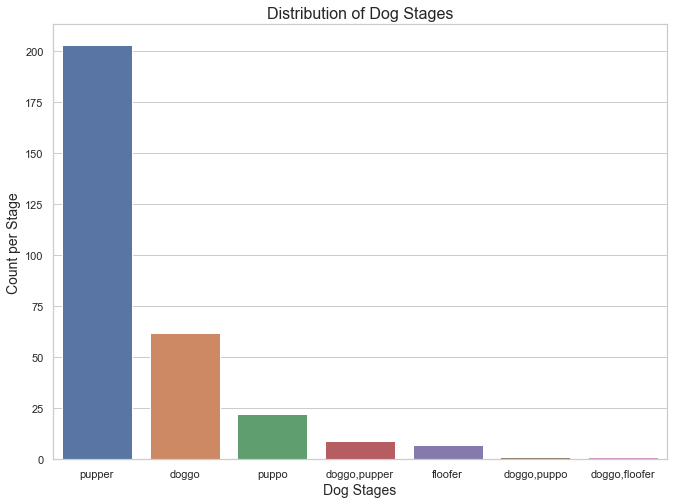

In [86]:
sns.set(style = 'whitegrid', rc={'figure.figsize':(11,8)})
sorted_stage = df['stage'].value_counts().index
sns.countplot(data = df, x ='stage', order = sorted_stage, orient='h')
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('Count per Stage', fontsize=14)
plt.title('Distribution of Dog Stages', fontsize=16)

In [87]:
# Get the value count of each dog stage in the dataframe
df.stage.value_counts()

pupper           203
doggo             62
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

From the plot distribution output the image predictions for dog stages, it shows that 'pupper' is the most popular dog stage with a value count of 203, with 'doggo,puppo' and 'doggo,floofer' having the lowest value count with respect to image predictions, recording value counts of 1.
It should also be noticed that there's huge amount of missing data in the dog 'stage' colum of the dataframe, therefore the distribution may not reflect the truth.

#### Question #2: Which dog breeds are the most popular?

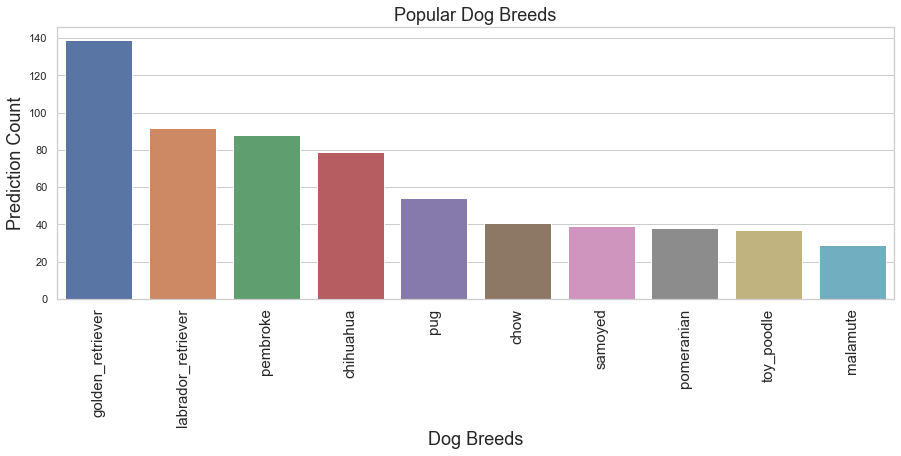

In [90]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = df['p1'].value_counts()[0:10].index,
            y =df['p1'].value_counts()[0:10],
            data = df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);

In [92]:
df.p1.value_counts().head(10)

golden_retriever      139
labrador_retriever     92
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                39
pomeranian             38
toy_poodle             37
malamute               29
Name: p1, dtype: int64

#### Question #3: What kind of correlation exist between retweet count and favourite count?

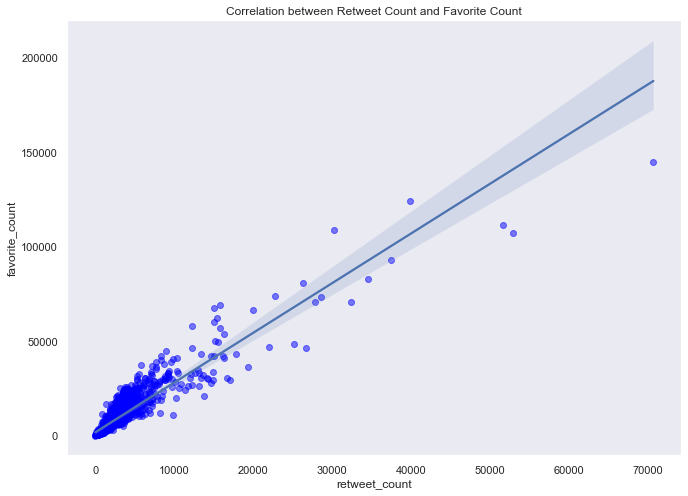

In [95]:
sns.set_style('dark')
sns.regplot(x= df.retweet_count, y = df.favorite_count, 
            scatter_kws = {'color': 'blue', 'alpha': 0.5}).set(title = 'Correlation between Retweet Count and Favorite Count');

From the above plot, we are checking for a correlation between retweet_count and favorite_count.

We see that there is a positive correlation between the two varibales. This by no means, mean that increase in retweet_count also causes an increase in favorite_count but comparing both linearly, there is a strong positive linear correlation between retweet_count and favorite_Count.

#### Question #4: From which source did we get the highest proportion of tweets on the WeRateDog twitter account?

<AxesSubplot:ylabel='source'>

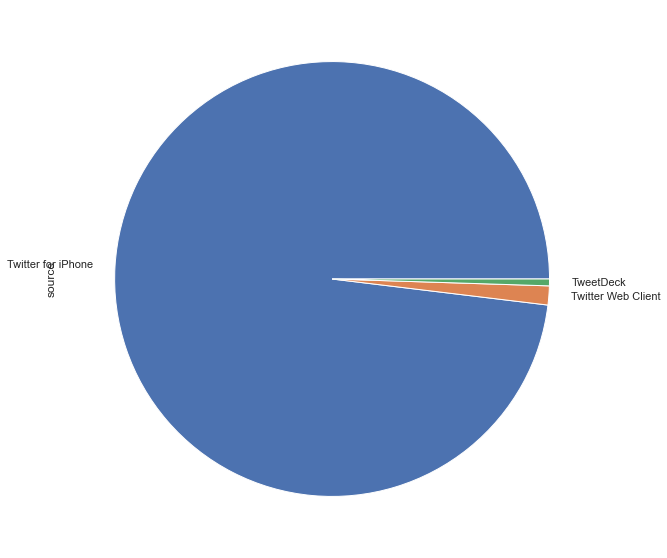

In [97]:
df.source.value_counts().plot(kind = 'pie', figsize = (10, 10))

From the visualization above it shows that the tweets from iPhone has the most sources, followed by Twitter Web Client with TweetDeck having the fewest.

#### Conclusion:

The data used for the above analysis and visualizations is the final merged data of all the three dataframes that were gathered, assessed and cleaned, and later saved into twitter_archive_master.csv file. It was assigned to the variable 'df' for easy reference for our analysis and visualizations.